# How severe was the United States of America's climate change compared to the rest of the world?


**Introduction**

The reference climate data are gathered by the Berkeley Earth and repackaged by Kaggle. Berkeley Earth was founded in 2010 to illustrate global warming by observing global temperatures and analyzing climate change from these data. This dataset contains the monthly average temperatures of cities, states, countries and the globe from 1950 to 2015. The PM2.5 Global Air Pollution 2010-2017 data is referenced by Brauer on The World Bank website.

This project aims to analyze the degree of climate change in the United States of America compared to global climate change. To achieve this goal, I will statistically graph and analyze the annual average temperatures in the US as well as the annual global average temperatures from 2003 to 2013. Analyzing the relation between the exposure of air pollution and the average temperatures procide a comprehensive understanding of Unite State's Climate change.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# upload the data
city_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByCity.csv")
major_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByMajorCity.csv")
state_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByState.csv")
country_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByCountry.csv")
global_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalTemperatures.csv")
pollution = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\PM2.5GlobalAirPollution.csv")

In [10]:
# data cleaning process
# drop the missing data
city_t = city_temperature.dropna()
major_t = major_temperature.dropna()
state_t = state_temperature.dropna()
country_t = country_temperature.dropna()
global_t = global_temperature.dropna()

In [49]:
# data cleaning process
# collect all the data of USA
us_city_t = city_t.groupby("Country").get_group("United States")
us_major_t = major_t.groupby("Country").get_group("United States")
us_state_t = state_t.groupby("Country").get_group("United States")
us_poll = pollution.dropna().groupby("Country Name").get_group("United States").drop(['2016', '2017'], axis=1)
us_poll_1 = us_poll.T.reset_index().drop([0, 1])
us_poll_1.rename(columns={"index": "Year", 227: "pm2.5"}, inplace=True)

Text(0.5, 1.0, 'Monthly Average Temperature of USA from 2003 to 2013')

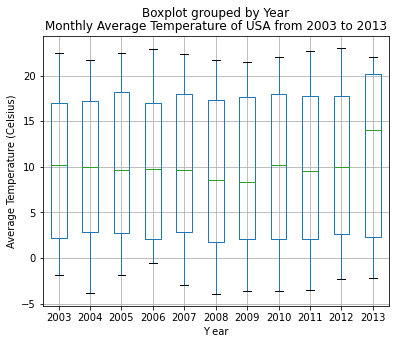

In [77]:
# graph 1
# graph the boxplot of the data of the USA from 2003 to 2013
# X : year
# Y : Average temperature (Celsius)
us_t = country_temperature.groupby("Country").get_group("United States")
usa_t = pd.DataFrame({"Year" : [x[:4] for x in us_t["dt"]], "Average Temperature" : us_t["AverageTemperature"]})
us_box = usa_t[usa_t["Year"]>"2002"].boxplot(by="Year", figsize=(6, 5))
us_box.set_ylabel("Average Temperature (Celsius)")
us_box.set_xlabel("Y ear")
us_box.set_title("Monthly Average Temperature of USA from 2003 to 2013")

Text(0.5, 1.0, 'Annual Average Temperature of USA from 2003 to 2013')

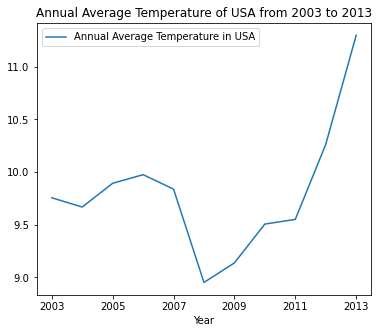

In [80]:
# graph 2
# A complement to graph 1
# X : year
# Y : Average temperature (Celsius)
us_annual_avgtemp = usa_t[usa_t["Year"]>"2002"].groupby("Year")["Average Temperature"]
annual_avg = pd.DataFrame()

# calculate the annual average temperature from the monthly average temperature
annual_avg["Annual Average Temperature in USA"] = us_annual_avgtemp.mean()
us_annual_temp_air = pd.merge(annual_avg.reset_index(), us_poll_1, on="Year", how="left").set_index("Year")
at_line = us_annual_temp_air.reset_index().plot(x="Year", y="Annual Average Temperature in USA", figsize=(6, 5))
at_line.set_title("Annual Average Temperature of USA from 2003 to 2013")

Text(0.5, 1.0, 'USA annual average PM 2.5 Exposure and the Annual Average Temperature')

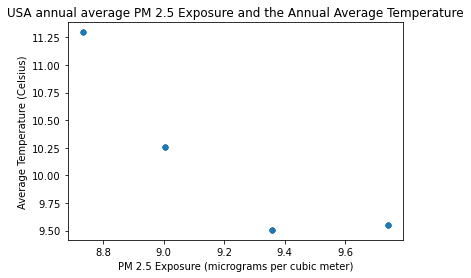

In [56]:
# graph 3
# graph the scatter plot of the Data of USA from 2010 to 2013
# X : PM2.5 micrograms per cubic meter
# Y : Average temperature (Celsius)
temp_air = pd.merge(usa_t[usa_t["Year"]>"2009"], us_poll_1, on="Year").set_index("Year")
temp_air["avg temp"] = usa_t[usa_t["Year"]>"2009"].groupby("Year")["Average Temperature"].mean()
us_dot = temp_air.plot(kind="scatter", x="pm2.5", y="avg temp")
us_dot.set_ylabel("Average Temperature (Celsius)")
us_dot.set_xlabel("PM 2.5 Exposure (micrograms per cubic meter)")
us_dot.set_title("USA annual average PM 2.5 Exposure and the Annual Average Temperature")

In [ ]:
# graph 4:
# A graph of the five largest countries in North America
# X : year
# Y : Average Temperature

